In [2]:
#Consulta de acciones en yahoo_finance
# Importando pandas y datetime
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from pandas.util.testing import assert_frame_equal

# PARTE I. Importación de información

# Extrayendo información financiera de Yahoo! Finance
inicio = dt.datetime(2020, 1, 1)
fin = dt.datetime(2020, 5, 25)

df1 = web.DataReader("MSFT", 'yahoo', inicio, fin)  # información de Microsoft
df2 = web.DataReader("AAPL", 'yahoo', inicio, fin)  # información de Apple
df3 = web.DataReader("NFLX", 'yahoo', inicio, fin)  # información de Ford
df4 = web.DataReader("BABA", 'yahoo', inicio, fin)  # información de Alibaba
df4[:300]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005
2020-01-08,220.649994,216.320007,216.600006,218.000000,11959100,218.000000
...,...,...,...,...,...,...
2020-05-18,215.470001,210.369995,212.500000,215.279999,23646800,215.279999
2020-05-19,220.589996,215.190002,216.729996,217.199997,21438100,217.199997
2020-05-20,221.156998,210.580002,220.000000,216.789993,38324100,216.789993


In [3]:
#Exportación a archivo de texto
df1.to_csv('C:\\Users\\Intel\\Documents\\Mis documentos IDEA\\Samples\\Archivos fuente.ILB\\yahoo_finance_.csv',sep = ";")

In [4]:
df1.insert(0, 'Symbol', 'MSFT')
df2.insert(0, 'Symbol', 'AAPL')
df3.insert(0, 'Symbol', 'NFLX')
df4.insert(0, 'Symbol', 'BABA')

In [5]:
df4.head()

,Symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,BABA,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,BABA,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,BABA,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,BABA,218.940002,216.690002,217.639999,217.630005,9388000,217.630005
2020-01-08,BABA,220.649994,216.320007,216.600006,218.000000,11959100,218.000000


In [6]:
# concatenando toda la información y reseteando el indice
combinado = pd.concat([df1, df2, df3, df4]).sort_index()
datos_todo = combinado.reset_index()

datos_todo.head()

,Date,Symbol,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,MSFT,160.729996,158.330002,158.779999,160.619995,22622100.0,159.737595
1,2020-01-02,NFLX,329.980011,324.779999,326.100006,329.809998,4485800.0,329.809998
2,2020-01-02,BABA,219.979996,216.539993,216.600006,219.770004,15873500.0,219.770004
3,2020-01-02,AAPL,300.600006,295.190002,296.239990,300.350006,33870100.0,298.829956
4,2020-01-03,MSFT,159.949997,158.059998,158.320007,158.619995,21116200.0,157.748581


In [7]:
# Armando una tabla pivot del precio de cierre
pivot = datos_todo.pivot(index='Date', columns='Symbol', 
                         values='Close')

pivot.head()

Symbol,AAPL,BABA,MSFT,NFLX
Date,,,,
2020-01-02,300.350006,219.770004,160.619995,329.809998
2020-01-03,297.429993,217.000000,158.619995,325.899994
2020-01-06,299.799988,216.639999,159.029999,335.829987
2020-01-07,298.390015,217.630005,157.580002,330.750000
2020-01-08,303.190002,218.000000,160.089996,339.260010


In [8]:
# PARTE II. Obtención de datos de multiples empresas
def all_stocks(symbols, start, end):
       def data(symbols):
           return web.DataReader(symbols, 'yahoo', start, end)
       datas = map(data, symbols)
       return pd.concat(datas, keys=symbols, names=['symbols','Date'])

simbolos = ['AAPL','MSFT','NFLX','IBM', 'BABA']

all_data = all_stocks(simbolos, inicio, fin)
all_data.head()

High         Low        Open       Close  \
symbols Date                                                         
AAPL    2020-01-02  300.600006  295.190002  296.239990  300.350006   
        2020-01-03  300.579987  296.500000  297.149994  297.429993   
        2020-01-06  299.959991  292.750000  293.790009  299.799988   
        2020-01-07  300.899994  297.480011  299.839996  298.390015   
        2020-01-08  304.440002  297.160004  297.160004  303.190002   

                        Volume   Adj Close  
symbols Date                                
AAPL    2020-01-02  33870100.0  298.829956  
        2020-01-03  36580700.0  295.924713  
        2020-01-06  29596800.0  298.282715  
        2020-01-07  27218000.0  296.879883  
        2020-01-08  33019800.0  301.655548

In [9]:
# Graficando los datos.
solo_cierre = all_data[['Close']].reset_index()
pivot_cierre = solo_cierre.pivot('Date', 'symbols', 'Close')

pivot_cierre.head()

symbols,AAPL,BABA,IBM,MSFT,NFLX
Date,,,,,
2020-01-02,300.350006,219.770004,135.419998,160.619995,329.809998
2020-01-03,297.429993,217.000000,134.339996,158.619995,325.899994
2020-01-06,299.799988,216.639999,134.100006,159.029999,335.829987
2020-01-07,298.390015,217.630005,134.190002,157.580002,330.750000
2020-01-08,303.190002,218.000000,135.309998,160.089996,339.260010


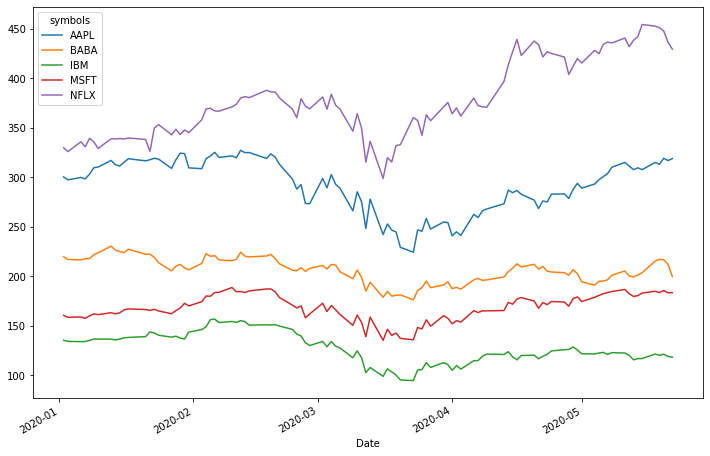

In [10]:
# Graficando todos
plot = pivot_cierre.plot(figsize=(12,8)) 